In [1]:
from matplotlib import pyplot as plt
from functools import partial
import random
import math

def difference_quotient(f,x,h):
    return (f(x+h)-f(x)) / h

def square(x):
    return x*x

def derivative(x):
    return 2*x

def distance(x,y):
    return math.sqrt(x**2 + y**2)

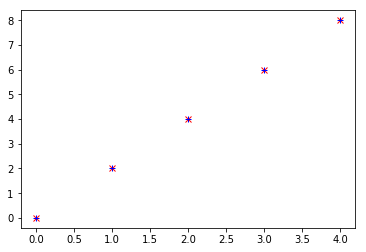

In [2]:
derivative_estimate = partial(difference_quotient, square, h=0.00001)
x = range(0,5)
list(map(derivative_estimate,x))
plt.plot(x, list(map(derivative,x)), 'rx')
plt.plot(x, list(map(derivative_estimate,x)), 'b+')

In [3]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v,direction)]

def sum_of_squares_gradient(v):
    return [2*v_i
           for v_i in v]

In [4]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('int')
    return safe_f

In [6]:
def minimize_batch(target_fn,gradient_fn,theta_0,tolerance=0.000001):
    step_sizes =[100,10,1,0.1,0.01,0.001,0.0001,0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta,gradient,-step_size)
                      for step_size in step_sizes]
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

In [16]:
def in_random_order(data):
    indexes = [i
              for i, _ in enumerate(data)]
    random.shuffle(indexes)
    
    for i in indexes:
        yield data[i]

In [18]:
def minimize_stochastic(target_fn,gradient_fn,x,y,theta_0,alpha_0=0.01):
    data = zip(x,y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float('inf')
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i,y_i,theta)
                   for x_i,y_i in data)

        if value < min_value:
            min_value, min_theta = value, theta
            iterations_with_no_improvement = 0
            alpha = alpha_0
        
        else: 
            iterations_with_no_improvement += 1
            alpha *= 0.9
            
        for x_i,y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i,y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

In [21]:
def negate(f):
    return lambda *args, **kwargs: -f(*args,**kwargs)

def negate_all(f):
    return lambda *args,**kwargs: [-y for y in f(*args,**kwargs)]

In [22]:
def maximize_stochastic(target_fn,gradient_fn,x,y,theta_0,alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                              negate_all(gradient_fn),
                              x,y,theta_0,alpha_0)